# Title: Heart Disease Prediction

<h1 style="font-family: 'poppins'; font-weight: bold; color: Green;">👨‍💻Author: Rana Anjum Sharif</h1>

[![GitHub](https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github)](https://github.com/AammarTufail) 
[![Kaggle](https://img.shields.io/badge/Kaggle-Profile-blue?style=for-the-badge&logo=kaggle)](https://www.kaggle.com/) 
[![Email](https://img.shields.io/badge/Email-Contact%20Me-red?style=for-the-badge&logo=email)](ranaanjumsharif@gmail.com)


---
[![GitHub](https://example.com/profile-picture.png)](https://github.com/your-username)

[![GitHub](https://img.shields.io/badge/GitHub-Profile-orange?style=for-the-badge&logo=github)](https://github.com/AammarTufail)

## Meta-Data (About Dataset)
## Context
This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

### Content
#### Column Descriptions:
* `id` (Unique id for each patient)
* `age` (Age of the patient in years)
* `origin` (place of study)
* `sex` (Male/Female)
* `cp` chest pain type 
  1. Typical angina
  2. Atypical angina
  3. Non-anginal,
  4. Asymptomatic
* `trestbps` resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* `chol` (serum cholesterol in mg/dl)
* `fbs` (if fasting blood sugar > 120 mg/dl)
* `restecg` (resting electrocardiographic results)
* -- `Values`: [normal, stt abnormality, lv hypertrophy]
* `thalach`: maximum heart rate achieved
* `exang`: exercise-induced angina (True/ False)
* `oldpeak`: ST depression induced by exercise relative to rest
* `slope`: the slope of the peak exercise ST segment
* `ca`: number of major vessels (0-3) colored by fluoroscopy
* `thal`: [normal; fixed defect; reversible defect]
* `num`: the predicted attribute
### Acknowledgements
#### Creators:
* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
#### Relevant Papers:
* Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
* David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database." 
* Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61. 
#### Citation Request:
The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigator responsible for the data collection at each institution. 

**They would be:**

* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.

## Aims and Ojectives

We will fill this after doing Exploratory Data Analysis (EDA).

### Import Libraries
Let's strat the project with importing all libraries that will be used in this project.

In [1]:
# importing libraries

# 1. to handle the data
import pandas as pd
import numpy as np

# to visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# to preprocess the data
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# to perform machine learning tasks
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score

# model use for classification tasks
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# model use for Regression tasks
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# metrics use for evaluation the classifier model 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# don't show warnings
import warnings
warnings.filterwarnings('ignore')


### Load the dataset

In [2]:
# load the dataset form csv file placed locally in our pc
df = pd.read_csv('heart_disease_uci.csv')

# print the first five rows of the dataset
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


## Exploratory Data Analysis
### Explore each column

In [3]:
# explory the datatype in ecah column
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [4]:
# Let's have a look on the shape of the dataset
print(f"the shape of the dataset is : {df.shape}")

the shape of the dataset is : (920, 16)


In [5]:
# id column
df['id'].min(),df['id'].max()

(1, 920)

In [6]:
# age column
df['age'].min(),df['age'].max()

(28, 77)

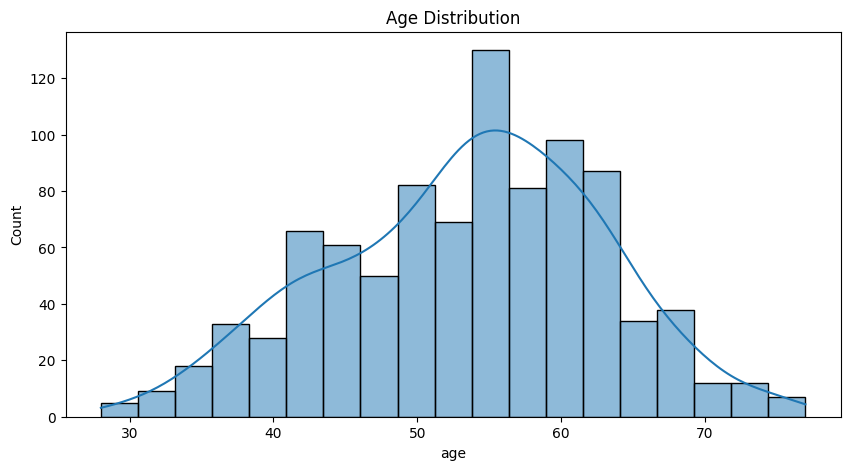

In [7]:
# draw a histogram plot to see the distribution of the age column
plt.figure(figsize=(10,5))
sns.histplot(df['age'],kde=True)
plt.title('Age Distribution')
plt.show()

Mean: 53.51086956521739
Median: 54.0
Mode: 54


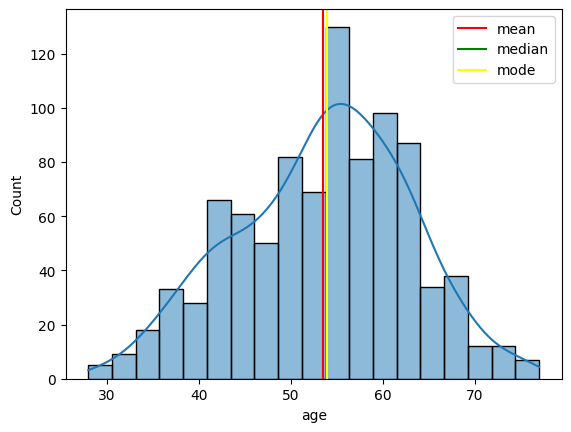

In [8]:
# print the value of mean, median and mode of age column
print('Mean:', df['age'].mean())
print('Median:', df['age'].median())
print('Mode:', df['age'].mode()[0])

# plot the mean,median,mode of the age column using sns
sns.histplot(df['age'], kde=True)
plt.axvline(df['age'].mean(),color='red',label='mean')
plt.axvline(df['age'].median(),color='green',label='median')
plt.axvline(df['age'].mode()[0],color='yellow',label='mode')
plt.legend()
plt.show()

Let's explore the gendar based distribution of the dataset for the age column

In [9]:
# plot the histrogram of the age column using plotly and coloring this by sex
fig = px.histogram(df, x='age', color='sex')
fig.show()

In [10]:
df['sex'].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

In [11]:
# let's calculate the percentage of male and female
male_count = 726
female_count = 194
total_count = male_count + female_count

# calculate the percentage
male_percentage = (male_count / total_count) * 100
female_percentage = (female_count / total_count) * 100

# print the percentage
print(f"Male percentage in the dataset: {male_percentage:.2f}%")
print(f"Female percentage in the dataset: {female_percentage:.2f}%")

# difference
difference_percentage = ((male_count - female_count) / female_count) * 100
print(f'Males are {difference_percentage:.2f}% more then females in the dataset') # 1.74x or 2.74x ziada han

Male percentage in the dataset: 78.91%
Female percentage in the dataset: 21.09%
Males are 274.23% more then females in the dataset


In [12]:
# find the values count of age column grouping by sex column
df.groupby('sex')['age'].value_counts()

sex     age
Female  54     15
        51     11
        62     10
        43      9
        48      9
               ..
Male    77      2
        28      1
        31      1
        33      1
        76      1
Name: count, Length: 91, dtype: int64

In [13]:
# Let's deal with dataset column
# find the unique values in the dataset column
df['dataset'].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [14]:
# Let's find the unique values in the dataset column
df['dataset'].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

In [15]:
# plot the countplot of dataset column
# sns.countplot(x='dataset',data=df, hue='sex')
# plt.show()

# Better plot with plotly
# plot the countplot of dataset column using plotly
fig = px.histogram(df, x='dataset', color='sex')
fig.show()

# print the values count of dataset column based on sex column/ groupby sex column
df.groupby('sex')['dataset'].value_counts()

sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: count, dtype: int64

In [16]:
# make a plot of age column using plotly grouping by dataset column
fig = px.histogram(df, x='age', color='dataset')
fig.show()

# print the mean, median and mode of age column based on dataset column
print(df.groupby('dataset')['age'].describe())
print('------------------------------------')
print('Mode', df.groupby('dataset')['age'].agg(pd.Series.mode))

               count       mean       std   min    25%   50%   75%   max
dataset                                                                 
Cleveland      304.0  54.351974  9.150256  28.0  47.75  55.5  61.0  77.0
Hungary        293.0  47.894198  7.738385  29.0  42.00  49.0  54.0  66.0
Switzerland    123.0  55.317073  9.032108  32.0  51.00  56.0  61.5  74.0
VA Long Beach  200.0  59.350000  7.811697  35.0  55.00  60.0  64.0  77.0
------------------------------------
Mode dataset
Cleveland              58
Hungary                54
Switzerland            61
VA Long Beach    [62, 63]
Name: age, dtype: object


#### Let'a deal with cp(Chest pain) column

In [17]:
# find the unique values in cp column
df['cp'].unique()

array(['typical angina', 'asymptomatic', 'non-anginal', 'atypical angina'],
      dtype=object)

In [18]:
# count the unique valuesv in cp column
df['cp'].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

In [19]:
# Let's groupby cp column based on sex
df.groupby('sex')['cp'].count()


sex
Female    194
Male      726
Name: cp, dtype: int64

In [20]:
# Let's make a plot of cp column using plotly base on sex column
fig = px.histogram(df, x='cp', color='sex')
fig.show()

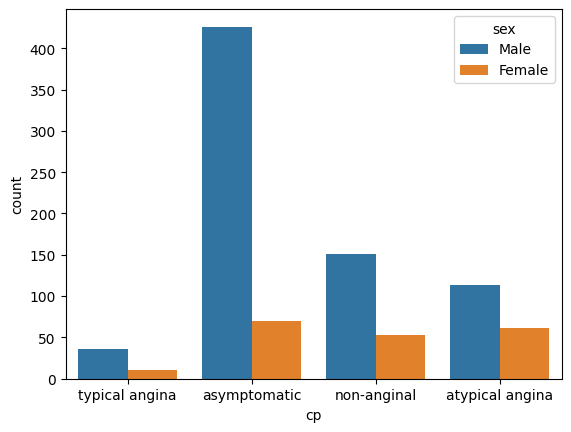

In [21]:
# count plot of cp column base on sex column
sns.countplot(x='cp',data=df, hue='sex')
plt.show()

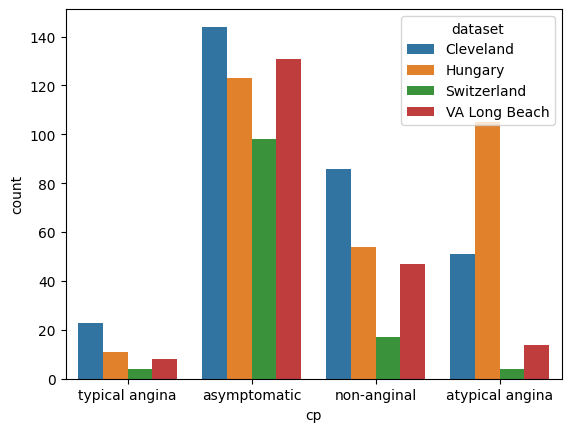

In [22]:
# count plot of cp column base on dataset column
sns.countplot(x='cp',data=df, hue='dataset')
plt.show()

In [23]:
# draw a plot of cp column using plotly base on age column
fig = px.histogram(df, x='age', color='cp')
fig.show()

#### Let's explore the trestbps (Resting blood pressure) column
The resting blood pressure (in mm Hg on admission to the hospital) is the force of blood pressure measured inside the blood vessel of the heart. It is measured between 90 and 200 mm Hg. The higher the pressure, the higher the blood pressure.
- The normal restting blood pressure is between 120/80 mm Hg

`Write here, what will happen if the blood pressure is high or low and then you can bin the data based on those values.`

In [24]:
# find the value counts of trestbps column
df['trestbps'].describe()

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

<Axes: xlabel='trestbps', ylabel='Count'>

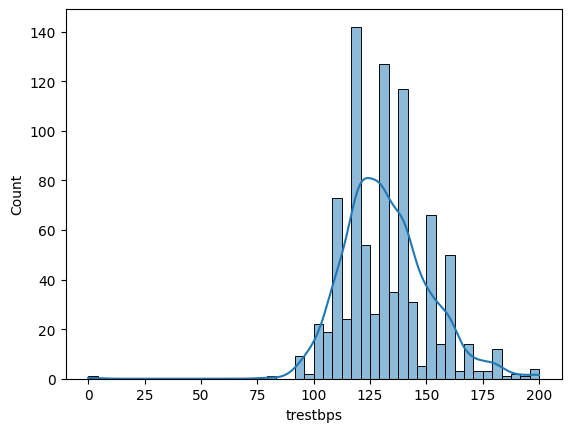

In [25]:
# create a histplot of trestbps column
sns.histplot(df['trestbps'], kde=True)

---

## <p style="color: yellow;font-weight: bold">Dealing with missing values</p>

- We are going to make a function to deal with missing values

In [26]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
missing_data_cols

['trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [27]:
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

In [28]:
# define the function to impute the missing values in thal column

def impute_categorical_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)
        
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

In [29]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)


ca          611
thal        486
slope       309
fbs          90
oldpeak      62
trestbps     59
thalch       55
exang        55
chol         30
restecg       2
dtype: int64

In [30]:
# remove warning
import warnings
warnings.filterwarnings('ignore')

# impute missing values using our functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass

Missing Values trestbps : 6.41%
MAE = 13.066936416184971 

RMSE = 17.06372256413192 

R2 = 0.09087131700699336 

Missing Values chol : 3.26%
MAE = 44.87325842696629 

RMSE = 64.09266731359202 

R2 = 0.6745866715174315 

Missing Values fbs : 9.78%
The feature 'fbs' has been imputed with 80.12 accuracy

Missing Values restecg : 0.22%
The feature 'restecg' has been imputed with 63.59 accuracy

Missing Values thalch : 5.98%
MAE = 16.781098265895956 

RMSE = 21.70588363538936 

R2 = 0.314915322222139 

Missing Values exang : 5.98%
The feature 'exang' has been imputed with 78.03 accuracy

Missing Values oldpeak : 6.74%
MAE = 0.5735930232558138 

RMSE = 0.7971303619568686 

R2 = 0.3946359194233541 

Missing Values slope : 33.59%
The feature 'slope' has been imputed with 69.92 accuracy

Missing Values ca : 66.41%
The feature 'ca' has been imputed with 67.74 accuracy

Missing Values thal : 52.83%
The feature 'thal' has been imputed with 72.41 accuracy



---
## <p style="color: yellow;font-weight: bold">Dealing with Outliers</p>

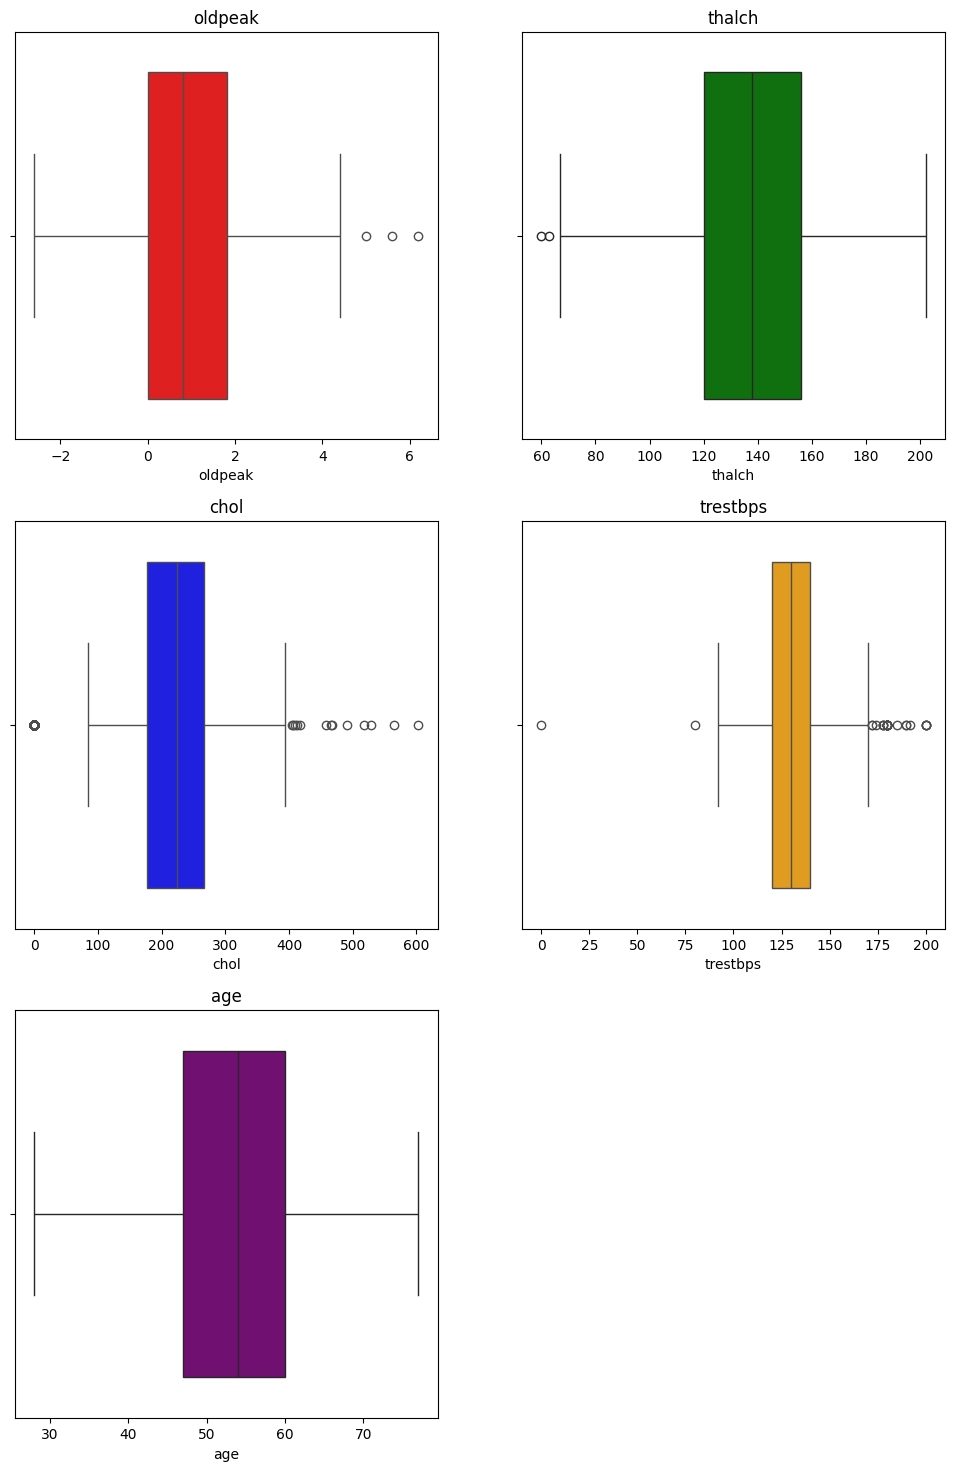

In [31]:
# Create the box plots for all numeric columns using for loop and subplot
plt.figure(figsize= (12,18))

colors = ['red','green','blue','orange','purple']

for i, col in enumerate(numeric_cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x = df[col], color= colors[i])
    plt.title(col)
plt.show()

In [32]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Assuming 'numeric_cols' is a list of your numeric column names and 'df' is your DataFrame
colors = ['red', 'green', 'blue', 'orange', 'purple']

# Create subplots
fig = make_subplots(rows=3, cols=2)

for i, col in enumerate(numeric_cols):
    row = (i // 2) + 1
    col_pos = (i % 2) + 1
    fig.add_trace(go.Box(y=df[col], name=col, marker_color=colors[i]), row=row, col=col_pos)

fig.update_layout(height=900, width=600, title_text="Box Plots")
fig.show()


In [33]:
# print the row from df where trestps is zero
df[df['trestbps'] == 0]

# remove this row from the data
df = df[df['trestbps'] != 0]



In [34]:
# print the row from df where ch0l is zero
df[df['chol'] == 0].value_counts().sum()

171

---
## <p style="color: yellow;font-weight: bold">Machine Learing</p>

In [35]:
df['num'].value_counts()

num
0    411
1    265
2    109
3    106
4     28
Name: count, dtype: int64

The Target Column is `num` which is the predicted attribute. We will use this column to predict the heart disease. The unique values in this column are: [0, 1, 2, 3, 4], which states that there are 5 types of heart diseases.

* 0 = no heart disease
* 1 = mild heart disease
* 2 = moderate heart disease 
* 3 = severe heart disease
* 4 = critical heart disease 

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 919 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        919 non-null    int64  
 1   age       919 non-null    int64  
 2   sex       919 non-null    object 
 3   dataset   919 non-null    object 
 4   cp        919 non-null    object 
 5   trestbps  919 non-null    float64
 6   chol      919 non-null    float64
 7   fbs       919 non-null    object 
 8   restecg   919 non-null    object 
 9   thalch    919 non-null    float64
 10  exang     919 non-null    object 
 11  oldpeak   919 non-null    float64
 12  slope     919 non-null    object 
 13  ca        919 non-null    float64
 14  thal      919 non-null    object 
 15  num       919 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 122.1+ KB


In [37]:
# split the dataset into X and y
X = df.drop('num', axis= 1)
y = df['num']

# encode the all columns of X dataset using LabelEncoder through for loop
le         = LabelEncoder()
# le_sex     = LabelEncoder()
# le_dataset = LabelEncoder()
# le_cp      = LabelEncoder()
# le_fbs     = LabelEncoder()
# le_restecg = LabelEncoder()
# le_exang   = LabelEncoder()
# le_slope   = LabelEncoder()
# le_thal    = LabelEncoder()
# # Task: Separate Encoder for all cat and object columns and inverse transform at the end
# df['sex']     = le_sex.fit_transform(df['sex'])
# df['dataset'] = le_dataset.fit_transform(df['dataset'])
# df['cp']      = le_cp.fit_transform(df['cp'])
# df['fbs']     = le_fbs.fit_transform(df['fbs'])
# df['restecg'] = le_restecg.fit_transform(df['restecg'])
# df['exang']   = le_exang.fit_transform(df['exang'])
# df['slope']   = le_slope.fit_transform(df['slope'])
# df['thal']    = le_thal.fit_transform(df['thal'])

for i in X.columns:
    if X[i].dtype == 'object' or X[i].dtype == 'category':
       
       X[i] = le.fit_transform(X[i])
else:
    pass

# split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 42)

Enlist all the models that you will use to predict the heart disease. These models should be classifiers for multi-class classification.

1. logistic regression
2. KNN
3. NB
4. SVM
5. Decision Tree
6. Random Forest
7. XGBoost
8. GradientBoosting
9. AdaBoost
10. lightGBM

In [38]:
# import the all models
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRFClassifier
from sklearn.naive_bayes import GaussianNB

# import pipline
from sklearn.pipeline import Pipeline

# import metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [39]:
models = {
    'AdaBoostClassifier'         : AdaBoostClassifier(random_state= 42),
    'RandomForestClassifier'     : RandomForestClassifier(random_state= 42),
    'GradientBoostingClassifier' : GradientBoostingClassifier(random_state= 42),
    'DecisionTreeClassifier'     : DecisionTreeClassifier(random_state= 42),
    'XGBRFClassifier'            : XGBRFClassifier(random_state= 42),
    'LogisticRegression'         : LogisticRegression(random_state= 42),
    'GaussianNB'                 : GaussianNB(),
    'Support Vector Machine'     : SVC(random_state= 42),
    'KNeighborsClassifier'       : KNeighborsClassifier()
}

In [40]:
# create a list of models to evaluate the performance
models = [
    ('AdaBoostClassifier'        , AdaBoostClassifier(random_state= 42)),
    ('RandomForestClassifier'    , RandomForestClassifier(random_state= 42)),
    ('GradientBoostingClassifier', GradientBoostingClassifier(random_state= 42)),
    ('DecisionTreeClassifier'    , DecisionTreeClassifier(random_state= 42)),
    ('XGBRFClassifier'           , XGBClassifier(random_state=42)),
    ('LogisticRegression'        , LogisticRegression(random_state= 42)),
    ('GaussianNB'                , GaussianNB()),
    ('Support Vector Machine'    , SVC(random_state= 42)),
    ('KNeighborsClassifier'      , KNeighborsClassifier())
]

best_model = None
best_accuracy = 0.0

# Itreave over the model and evaluate their performance
for name, model in models:

    # Create the pipeline 
    pipeline = Pipeline([

        ('model', model)
    ])
    
    # perform cross-validation 
    score = cross_val_score(pipeline, X_train, y_train, cv=5)

    # calculate mean accuracy
    mean_accuracy = score.mean()

    # fit the model 
    pipeline.fit(X_train,y_train)

    # Make prediction
    y_pred = pipeline.predict(X_test)

    # calculate the accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    # Print the performance of metrices
    print('Model: ', name)
    print('Cross Validation Accuracy: ', mean_accuracy)
    print('Test Accuracy: ', accuracy)
    print('-----------------------------')

    # check if the current model has best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline


print('Best Model: ', best_model)



Model:  AdaBoostClassifier
Cross Validation Accuracy:  0.5894622093023256
Test Accuracy:  0.5760869565217391
-----------------------------
Model:  RandomForestClassifier
Cross Validation Accuracy:  0.6719113372093023
Test Accuracy:  0.6557971014492754
-----------------------------
Model:  GradientBoostingClassifier
Cross Validation Accuracy:  0.6360343992248062
Test Accuracy:  0.6666666666666666
-----------------------------
Model:  DecisionTreeClassifier
Cross Validation Accuracy:  0.5909883720930232
Test Accuracy:  0.605072463768116
-----------------------------
Model:  XGBRFClassifier
Cross Validation Accuracy:  0.6500242248062016
Test Accuracy:  0.6630434782608695
-----------------------------
Model:  LogisticRegression
Cross Validation Accuracy:  0.5163032945736434
Test Accuracy:  0.5036231884057971
-----------------------------
Model:  GaussianNB
Cross Validation Accuracy:  0.5739704457364342
Test Accuracy:  0.5543478260869565
-----------------------------
Model:  Support Vector 

In [41]:
# Create a list of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('Support Vector Machine', SVC(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Ada Boost', AdaBoostClassifier(random_state=42)),
    ('XG Boost', XGBClassifier(random_state=42)),
    ('Naive Bayes', GaussianNB())
]

best_model = None
best_accuracy = 0.0

# Iterate over the models and evaluate their performance
for name, model in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        # ('imputer', SimpleImputer(strategy='most_frequent')),
        # ('encoder', OneHotEncoder(handle_unknown='ignore')),
        ('model', model)
    ])
    
    # Perform cross-validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    
    # Calculate mean accuracy
    mean_accuracy = scores.mean()
    
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)
    
    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print the performance metrics
    print("Model:", name)
    print("Cross-validation Accuracy:", mean_accuracy)
    print("Test Accuracy:", accuracy)
    print()
    
    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Retrieve the best model
print("Best Model:", best_model)


Model: Random Forest
Cross-validation Accuracy: 0.6719113372093023
Test Accuracy: 0.6557971014492754

Model: Gradient Boosting
Cross-validation Accuracy: 0.6360343992248062
Test Accuracy: 0.6666666666666666

Model: Support Vector Machine
Cross-validation Accuracy: 0.5785731589147287
Test Accuracy: 0.5869565217391305

Model: Logistic Regression
Cross-validation Accuracy: 0.5163032945736434
Test Accuracy: 0.5036231884057971

Model: K-Nearest Neighbors
Cross-validation Accuracy: 0.5707727713178294
Test Accuracy: 0.6086956521739131

Model: Decision Tree
Cross-validation Accuracy: 0.5909883720930232
Test Accuracy: 0.605072463768116

Model: Ada Boost
Cross-validation Accuracy: 0.5894622093023256
Test Accuracy: 0.5760869565217391

Model: XG Boost
Cross-validation Accuracy: 0.6500242248062016
Test Accuracy: 0.6630434782608695

Model: Naive Bayes
Cross-validation Accuracy: 0.5739704457364342
Test Accuracy: 0.5543478260869565

Best Model: Pipeline(steps=[('model', GradientBoostingClassifier(rand

In [42]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

# split the dataset into X and y
X = df.drop('num', axis= 1)
y = df['num']

def select_best_model(X, y):
    """
    Selects the best hyperparameter-tuned model for multiclass classification.
    
    Args:
        X (pd.DataFrame): Features (input data).
        y (pd.Series): Target labels.
    
    Returns:
        str: Name of the best model.
    """
    # Step 1: Encode labels using LabelEncoder
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)
    label_mapping = {i: label for i, label in enumerate(label_encoder.classes_)}
    
    # Step 2: Split dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
    
    # Step 3: Define classifier algorithms
    models = {
        "Random Forest": RandomForestClassifier(),
        "Gradient Boosting": GradientBoostingClassifier(),
        "Logistic Regression": LogisticRegression(),
        "SVM": SVC(),
        "K-Nearest Neighbors": KNeighborsClassifier(),
        "Naive Bayes": GaussianNB(),
        "Decision Tree": DecisionTreeClassifier(),
        "Neural Network": MLPClassifier(),
        # Add more classifiers as needed
    }
    
    # Step 4: Initialize variables
    best_model = None
    best_accuracy = 0.0
    
    # Step 5: Iterate over models and evaluate performance
    for model_name, model in models.items():
        pipeline = Pipeline([
            ("model", model)
        ])
        
        # Step 6: Create pipeline
        
        # Step 7: Perform cross-validation
        cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring="accuracy")
        
        # Step 8: Calculate mean accuracy
        mean_accuracy = np.mean(cv_scores)
        
        # Step 9: Fit the model
        pipeline.fit(X_train, y_train)
        
        # Step 10: Make predictions
        y_pred = pipeline.predict(X_test)
        
        # Step 11: Calculate accuracy score
        test_accuracy = accuracy_score(y_test, y_pred)
        
        # Step 12: Print performance metrics
        print(f"{model_name}: Mean CV Accuracy = {mean_accuracy:.4f}, Test Accuracy = {test_accuracy:.4f}")
        
        # Step 13: Check if current model has best accuracy
        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            best_model = model_name
    
    # Step 14: Print the best model
    print(f"Best Model: {best_model}")
    return best_model

# Example usage:
# X = your feature matrix (e.g., X_train)
# y = your target labels (e.g., y_train)
# best_model_name = select_best_model(X, y)


In [43]:
best_model_name = select_best_model(X, y)

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\NEW\miniconda3\envs\python_ml\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\NEW\miniconda3\envs\python_ml\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\NEW\miniconda3\envs\python_ml\Lib\site-packages\sklearn\pipeline.py", line 475, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "c:\Users\NEW\miniconda3\envs\python_ml\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\NEW\miniconda3\envs\python_ml\Lib\site-packages\sklearn\ensemble\_forest.py", line 363, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\NEW\miniconda3\envs\python_ml\Lib\site-packages\sklearn\base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\NEW\miniconda3\envs\python_ml\Lib\site-packages\sklearn\utils\validation.py", line 1263, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "c:\Users\NEW\miniconda3\envs\python_ml\Lib\site-packages\sklearn\utils\validation.py", line 997, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\NEW\miniconda3\envs\python_ml\Lib\site-packages\sklearn\utils\_array_api.py", line 521, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\NEW\miniconda3\envs\python_ml\Lib\site-packages\pandas\core\generic.py", line 2150, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'Male'


#### Outputs:
1. The minimun age of heart disease patients strats from 28 years old.
2. Most of peaple get heart disease at the age of 53-54 years old.
3. Most of the male and female get heart disease at the age of 54-55 years old.
4. Male percentage in the dataset: 78.91%
5. Female percentage in the dataset: 21.09%
6. Males are 274.23% more then females in the dataset
7. The highest number of peaple from Cleveland (304) and lowest from Switzerland (123)
   1. The highest number of female from Cleveland (97) and lowest from VA Long Beach (6)
   2. The highest number of male from Hungary (212) and lowest from Switzerland (113)
8. `Decribe the age column based on dataset column.`
   
  | Dataset       | Count | Mean      | Std       | Min  | 25%   | 50%  | 75%  | Max |
| ------------- | ----- | --------- | --------- | ---- | ----- | ---- | ---- | --- |
| Cleveland     | 304.0 | 54.351974 | 9.150256  | 28.0 | 47.75 | 55.5 | 61.0 | 77.0|
| Hungary       | 293.0 | 47.894198 | 7.738385  | 29.0 | 42.00 | 49.0 | 54.0 | 66.0|
| Switzerland   | 123.0 | 55.317073 | 9.032108  | 32.0 | 51.00 | 56.0 | 61.5 | 74.0|
| VA Long Beach | 200.0 | 59.350000 | 7.811697  | 35.0 | 55.00 | 60.0 | 64.0 | 77.0|

------------------------------------

Mode of the dataset:

- Cleveland: 58
- Hungary: 54
- Switzerland: 61
- VA Long Beach: [62, 63]
9. The number of count of chest pain in male are given below
   1.  Asymptomatic: 426
   2.  Non-anginal:  151       
   3.  Atypical angina: 113   
   4.  Atypical angina: 36
10. The number of count of chest pain in female are given below
    1. Asymptomatic: 70
    2. Non-anginal:  53
    3. Atypical angina: 61 
    4. Atypical angina: 10
  
